In [1]:
#%autosave 0
from IPython.core.display import HTML, display
display(HTML("<style>.container { width:100% !important; } </style>"))

# Introduction to Tensor Flow

In this notebook we show how to find the minimum of the function
$$ x \mapsto \exp(x) - 2 \cdot x^2 + 1 $$
using the <font style="color:blue;">TensorFlow</font> library. 
We compute this function with `numpy`.
As we want to plot this function, we also load the modules <tt>matplotlib</tt> and `seaborn`.

In [2]:
import numpy             as np
import matplotlib.pyplot as plt
import seaborn           as sns

First, we define the function $x \mapsto \exp(x) - 2 \cdot x^2 + 1$ as a Python function that can take a 
`numpy` array as its argument.

In [3]:
def fm(x):
    return np.exp(x) - 2 * x**2 + 1

Next, we plot this function for all $x$ such that $-1 \leq x \leq 3$.

Text(0.5,1,'x |-> exp(x) - 2 * x**2 + 1')

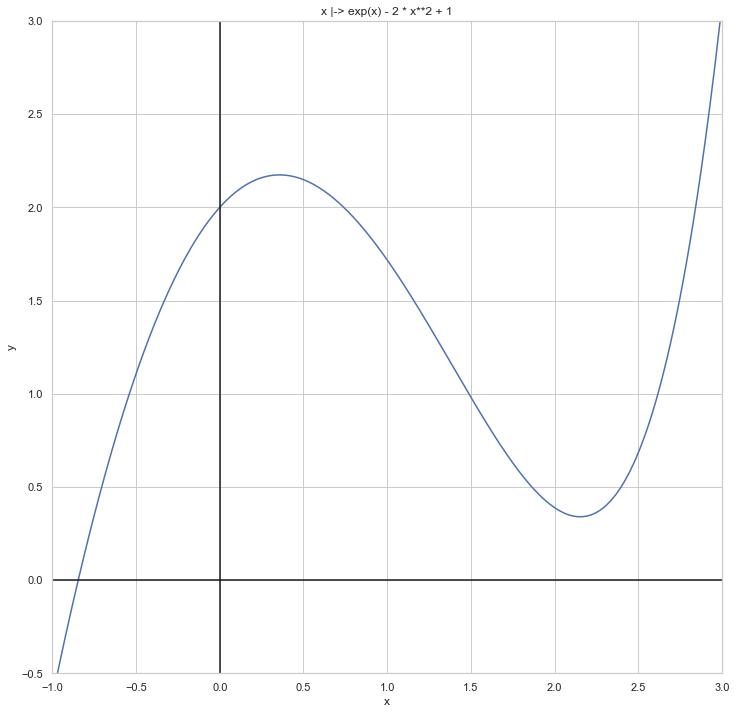

In [4]:
Xs = np.arange(-1.0, 3, 0.01)
Ys = fm(Xs)
plt.figure(figsize=(12,12))
sns.set(style='whitegrid')
sns.lineplot(Xs, Ys, color='b')
plt.axvline(x=0.0, c='k')
plt.axhline(y=0.0, c='k')
plt.ylim(-0.5, 3.0)
plt.xlim(-1.0, 3,0)
plt.xlabel('x')
plt.ylabel('y')
plt.title('x |-> exp(x) - 2 * x**2 + 1')

For $x \geq 0$, the function $f$ seems to have a minimum somewhere between $2.0$ and $2.5$.  We want to compute this minimum numerically using <font style="color:blue;">gradient descent</font> via 
<a href="https://www.tensorflow.org">TensorFlow</a>, but we do not want to compute the gradient of 
$f$ ourselves.

In [5]:
import tensorflow as tf

We start by defining a variable $x$.  Later, we will define the function 
$$ f(x) := \exp(x) - 2 \cdot x^2 + 1 $$
and compute the value $x_0$ such that $f(x_0) \leq f(x)$ for all $x \geq 0$.  The variable $x$ is a single precision variable, hence we use <tt>tf.float32</tt> as its data type.  The variable is initialized to the value $1$.  We also assign a *name* to it, but this name is completely optional, since this name is only used when we 
print the variable.  Hence it is only useful for debugging.

In [6]:
x = tf.Variable(1, dtype=tf.float32, name='var_x')
x

<tf.Variable 'var_x:0' shape=() dtype=float32_ref>

Since this is a variable that contains only a single number and not an array or a matrix, its shape is 
<tt>()</tt>.  The string <tt>'var_x:0'</tt> is an internal name used by TensorFlow to manage this variable. 
Note that TensorFlow has appended the string <tt>':0'</tt> at the end of the string <tt>hugo</tt> in order to ensure that this name is unique.

Let us define a <font style="color:blue;">cost function</font> $f$ using `tensorflow` next.  Mathematically, 
this cost function is the function $f$ from above:
$$ f(x) = \exp(x) - 2 \cdot x^2 + 1 $$
Note that we have used the variable `x` defined above in the right hand side of this definition.

In [7]:
f = tf.exp(x) - 2 * x*x + 1
f

<tf.Tensor 'add:0' shape=() dtype=float32>

Conceptually, `f` as defined above is a term made up from constants and variables.  Technically, `f` is an object of the class `Tensor`.  Since the last operation that is executed when computing $f(x)$ is the
addition of $1$ and, conceptually, a tensor is just an <font style="color:blue;">abstract syntax tree</font> representing an expression, this tensor has the internal name `add:0`.

Having defined the function $f$, we can now try to minimize it via 
<font style="color:blue;">gradient descent</font>.  The module <tt>tf.train</tt> contains various algorithms for minimization.  <tt>tf.train.GradientDescentOptimzer</tt> is the optimizer that implements *gradient descent*.  When doing *gradient descent*, we will use a <font style="color:blue;">learning rate</font> $\alpha$ of $0.2$.  Using a smaller learning rate would slow down *gradient descent*, but if we would use a learning rate that is significantly larger, then gradient descent would start to <font style="color:blue;">oscillate</font> and 
hence *gradient descent* would **not converge** and, therefore, it would not be able to find the minimum.  

In [8]:
α     = 0.2
train = tf.train.GradientDescentOptimizer(α).minimize(f)

Up to now, <tt>train</tt> is just an object.

In [9]:
train

<tf.Operation 'GradientDescent' type=NoOp>

In order to start running the *gradient descent* optimizer, we first have to create an 
<font style="color:blue;">initializer object</font> that can later be used to initialize **all** of our variables.  Of course, in this simple example there is just one variable <tt>x</tt>, but in general, there could be many different variables.

In [10]:
init = tf.global_variables_initializer()
init

<tf.Operation 'init' type=NoOp>

Next, we start a TensorFlow <font style="color:blue;">session</font> that performs the real work.  <tt>Session</tt> is a TensorFlow class that has a method called <tt>run</tt>.  This method can be used to 
<font style="color:blue;">evaluate</font> a variable or to perform one step of an iterative algorithm like *gradient descent*.

In [11]:
with tf.Session() as session:
    session.run(init)         # initialize x to 1
    for k in range(12):       # we do 12 steps of gradient descent
        session.run(train)    # run one step of gradient descent 
        v = session.run(x)    # evaluate x so we can print it
        print('%2d: %f' % (k, v)) 

 0: 1.256344
 1: 1.558908
 2: 1.855309
 3: 2.060821
 4: 2.138995
 5: 2.152011
 6: 2.153192
 7: 2.153285
 8: 2.153292
 9: 2.153292
10: 2.153292
11: 2.153292


This computation shows that the function $f$ takes its minimal value if $x \approx 2.1532924$.

Note that although we have used gradient descent, we never had to calculate the derivative of the function $f$.
This derivative has been calculated by TensorFlow instead. 